## TEXTUAL CLASSIFICATION USING HEALTH TWEETS DATASET

dataset The Aim of this project is to classify these dataset into different relevant topics and also build a classification model to predict other headline segments

In [3]:

# warming to ignore warnings of depreciation
import warnings
#Numpy is used for Scientific calculations
import numpy as np
#pandas is used for data analysis
import pandas as pd
#matplotlib.pyployt and seaborn is used for data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#Used for string manipulations
import re
import glob
from textblob import TextBlob
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
from gensim.models import Word2Vec 
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer
from nltk.tokenize import RegexpTokenizer
%matplotlib inline
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### TEXTBLOB
TextBlob is a python library for Natural Language Processing (NLP), It is great for people who are starting out in with NLP. TextBlob is a simple library which supports complex analysis and operations on textual data.bold text


*   Read and import data using Textblob.
*   Create a dataframe and convert into the data csv file



In [ ]:

#create a path of the dataset storage and open a empty 
path = '/content/drive/MyDrive/TEXT CLUSTERING/Health-Tweets/'
files = []
dfs = []
#Using For loop to iterate the the dataset content and use the open function to read the dataset
#And append them into the empty variable that was created earlier
for txt in glob.glob('/content/drive/MyDrive/TEXT CLUSTERING/Health-Tweets/*'):
  print(txt)
  try:
    with open(txt, 'r', encoding='utf8') as file:
        data = file.read()
        files.append(data)
  except:
    with open(txt, 'r', encoding='cp1252') as file:

        data = file.read()
        files.append(data)


#Combine the data into a dataframe using pandas
  data_df = pd.DataFrame(columns=['tweet_ID', 'data_time', 'tweet', 'source_file'])
  for col in data.split('\n'):
    try:
      tweet = col.split('|')
      rows = {'tweet_ID':tweet[0], 'data_time':tweet[1], 'tweet':tweet[2], 'source_file':txt}
      data_df = data_df.append(rows, ignore_index=True)
    except:
      continue
  dfs.append(data_df)

/content/drive/MyDrive/TEXT CLUSTERING/Health-Tweets/bbchealth.txt
/content/drive/MyDrive/TEXT CLUSTERING/Health-Tweets/foxnewshealth.txt
/content/drive/MyDrive/TEXT CLUSTERING/Health-Tweets/gdnhealthcare.txt
/content/drive/MyDrive/TEXT CLUSTERING/Health-Tweets/KaiserHealthNews.txt


In [ ]:

#Concatenate the dataset and check the first five roles using the .head() function 
df = pd.concat(dfs, ignore_index=True)
df.head()

In [ ]:

#Save the dataset as CSV and read the dataset.
#df.to_csv("/content/drive/MyDrive/TEXT CLUSTERING/health_tweets.csv", index=False)
df = pd.read_csv("/content/drive/MyDrive/TEXT CLUSTERING/health_tweets.csv")

In [ ]:

#check the first five roles
df.head()

,tweet_ID,data_time,tweet,source_file
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...


Clean the tweets


In [ ]:

#Wrote a function to clean the dataset removing all the Retweets, Hyperlink, Mentions and Hashtags
def cleaning(tw):
    # Regular Expressions
    tw = re.sub(r"RT ", "", tw)         # Retweet 
    tw = re.sub(r" http[\S]+" , "", tw) # Hyperlinks
    tw = re.sub(r"@[\S]+ " , "", tw)    # Mentions
    tw = re.sub(r"#" , "", tw)          # Hastags
    
    return tw.lower()
    
df["tweet_cl"] = df["tweet"].apply(cleaning)

In [ ]:

#check the first five roles
df.head()

In [ ]:

#clean the source of the tweet and separate the tweet sources into a column
path = '/content/drive/MyDrive/TEXT CLUSTERING/Health-Tweets/'
def clean_sourcefile(twt):
    twt = twt.replace(path, "")
    twt = twt.replace(".txt", "")
    twt = twt.replace("\\", "")
    twt = twt.replace("/", "")
                  
    return twt
    
df["source"] = df["source_file"].apply(clean_sourcefile)

### textblob sentiment analysis 


In [ ]:
def subj(twt):
    return TextBlob(twt).sentiment.subjectivity

def polar(twt):
    return TextBlob(twt).sentiment.polarity

df["Subjectivity"] = df["tweet_cl"].apply(subj)
df["Polarity"] = df["tweet_cl"].apply(polar)

In [ ]:
import gc
gc.collect()

In [ ]:
df.sample(10)

In [ ]:
df['data_time'] = pd.to_datetime(df['data_time'])

In [ ]:
df.info()

In [ ]:
df.describe()

Visualization 

In [ ]:
sns.scatterplot(df.Polarity,df.Subjectivity)

In [ ]:
df_corr = df.corr()
fig = sns.heatmap(df_corr)

In [ ]:
for item in df['source'].unique():
  items = df[df['source']==item]
  items  = items[['Subjectivity', 'Polarity', 'source']]
  sns.scatterplot(data=items, x=items['Polarity'], y=items['Subjectivity'])
  plt.title(item)
  plt.show()

In [ ]:
sns.countplot(df['source'])

In [ ]:
df.to_csv('/content/drive/MyDrive/TEXT CLUSTERING/health_cleaned.csv')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/TEXT CLUSTERING/health_cleaned.csv')

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df['tweet_cl'].values.tolist()
df['words']= list(sent_to_words(data))
# remove stop words
df['words'] = remove_stopwords(df['words'])
print(df['words'][:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['breast', 'cancer', 'risk', 'test', 'devised']


In [6]:
df.head()

,Unnamed: 0,tweet_ID,data_time,tweet,source_file,tweet_cl,source,Subjectivity,Polarity,words
0,0,585978391360221184,2015-04-09 01:31:50+00:00,Breast cancer risk test devised http://bbc.in/...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...,breast cancer risk test devised,bbchealth,0.000000,0.000000,"[breast, cancer, risk, test, devised]"
1,1,585947808772960257,2015-04-08 23:30:18+00:00,GP workload harming care - BMA poll http://bbc...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...,gp workload harming care - bma poll,bbchealth,0.000000,0.000000,"[gp, workload, harming, care, bma, poll]"
2,2,585947807816650752,2015-04-08 23:30:18+00:00,Short people's 'heart risk greater' http://bbc...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...,short people's 'heart risk greater',bbchealth,0.400000,0.250000,"[short, people, heart, risk, greater]"
3,3,585866060991078401,2015-04-08 18:05:28+00:00,New approach against HIV 'promising' http://bb...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...,new approach against hiv 'promising',bbchealth,0.477273,0.168182,"[new, approach, hiv, promising]"
4,4,585794106170839041,2015-04-08 13:19:33+00:00,Coalition 'undermined NHS' - doctors http://bb...,/content/drive/MyDrive/TEXT CLUSTERING/Health-...,coalition 'undermined nhs' - doctors,bbchealth,0.000000,0.000000,"[coalition, undermined, nhs, doctors]"


In [7]:
from nltk.corpus import stopwords
vectoriser = TfidfVectorizer(min_df = .01, stop_words=stopwords.words("english"), ngram_range=(1,3))

In [8]:
df_tfidf = vectoriser.fit_transform(df['tweet_cl'])
keys = list(vectoriser.vocabulary_.keys())
df_tfidf = pd.DataFrame(df_tfidf.toarray())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.0,0.0,0.0,0.0,0.0,0.678162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.734913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.586345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.591676,0.0,0.553280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746551,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.665328,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.630256,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776387,0.0,0.0,0.0,0.0,0.0,0.0
63322,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
63323,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
63324,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.741605,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.670836,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
temp = df_tfidf.copy()
temp.columns = keys
temp.to_csv("/content/drive/MyDrive/TEXT CLUSTERING/df_tfidf.csv", index=False)
temp

,cancer,risk,care,people,heart,new,nhs,doctors,video,day,life,amp,may,health,patients,outbreak,food,hospital,drug,good,could,drugs,mental,use,women,ebola,healthcare,medical,first,healthy,time,one,us,diet,brain,disease,help,make,get,flu,best,patient,law,says,study,doctor,today,like,kids,work,health care,see,year,need,death,insurance,say,many,exercise,better,via,finds,study finds,weight,try,want,10,know,well,foods,reports,obamacare,fda,ways,healthtalk
0,0.0,0.0,0.0,0.0,0.0,0.678162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.734913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.586345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.591676,0.0,0.553280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746551,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.665328,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.630256,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776387,0.0,0.0,0.0,0.0,0.0,0.0
63322,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
63323,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
63324,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.741605,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.670836,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
used = df_tfidf.copy()
use = df_tfidf.copy()
use.columns = keys
use

,cancer,risk,care,people,heart,new,nhs,doctors,video,day,life,amp,may,health,patients,outbreak,food,hospital,drug,good,could,drugs,mental,use,women,ebola,healthcare,medical,first,healthy,time,one,us,diet,brain,disease,help,make,get,flu,best,patient,law,says,study,doctor,today,like,kids,work,health care,see,year,need,death,insurance,say,many,exercise,better,via,finds,study finds,weight,try,want,10,know,well,foods,reports,obamacare,fda,ways,healthtalk
0,0.0,0.0,0.0,0.0,0.0,0.678162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.734913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.586345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.591676,0.0,0.553280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746551,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.665328,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.630256,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776387,0.0,0.0,0.0,0.0,0.0,0.0
63322,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
63323,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
63324,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.741605,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.670836,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Clustering using Kmeans
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. K-means clustering uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid. After every point has been assigned, the centroid is moved to the average of all of the points assigned to it.


In [1]:
df_tfidf.to_csv("/content/drive/MyDrive/TEXT CLUSTERING/df_tfidf.csv")

NameError: ignored

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_tfidf)
    distortions.append(model.inertia_)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', marker='D')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
num_clusters = 4
model_km = KMeans(n_clusters=num_clusters, random_state=2020)
model_km.fit(df_tfidf)

clusters = model_km.labels_.tolist()
print(len(set(clusters)))

df_tfidf["cluster"] = clusters

In [ ]:
df_tfidf.sample(10)

In [ ]:
temp.head(70)

In [ ]:
for c in set(df_tfidf["cluster"].tolist()):
    print("{:=^50}".format(c))
    temp = pd.DataFrame(df_tfidf[df_tfidf["cluster"]==c].drop(columns=["cluster"]).sum(axis=0))
    temp = temp.sort_values(by=0, ascending=False)
    temp["word"] = [keys[x] for x in temp.index.values]
    
    display(temp.head(10))    
    
    freq = {}
    for index, row in temp.iterrows():
        freq[row["word"]] = row[0]
    
    wordcloud = WordCloud().generate_from_frequencies(freq)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Cluster {}".format(c), fontsize=25)
    plt.show()

In [ ]:
df['cluster_keys'] = temp['word']
df["cluster"] = clusters
df["cluster_labels"] = model_km.labels_
df.sample(20)

In [ ]:
df.to_csv('/content/drive/MyDrive/TEXT CLUSTERING/data.csv')


## another clustering

In [11]:
#Library for Dimension Reduction
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
X = pca.fit_transform(used) 
X = pd.DataFrame({'dim1': X[:, 0], 'dim2': X[:, 1]})
X.shape

(63326, 2)

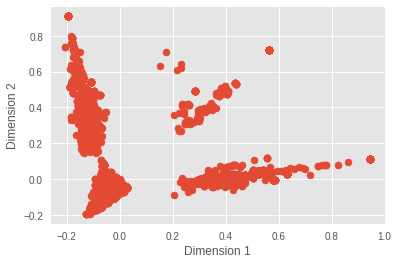

In [13]:
f=plt.figure()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X['dim1'],X['dim2'] )
plt.show()

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    distortions.append(model.inertia_)

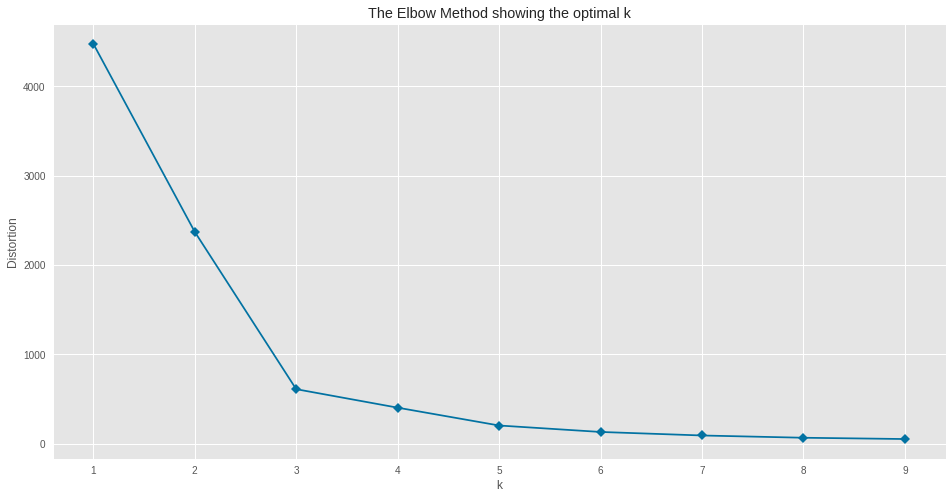

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-', marker='D')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
num_clusters = 2
model_km = KMeans(n_clusters=num_clusters, random_state=2020)
model_km.fit(X)

clusters = model_km.labels_.tolist()
print(len(set(clusters)))

used["NEWcluster"] = clusters

2


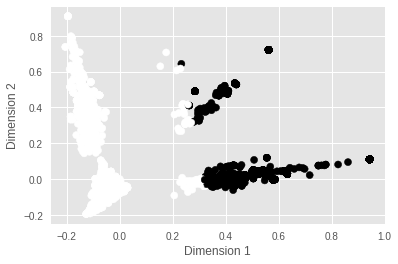

In [ ]:

kmeans_labels= model_km.predict(X)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X['dim1'],X['dim2'], c=kmeans_labels )

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

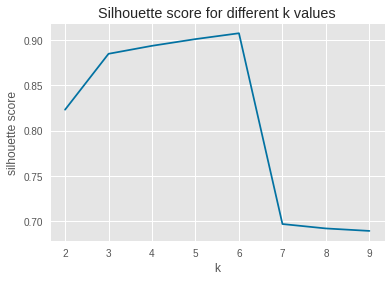

In [ ]:
silhouette = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    #labels= km.predict(X)
    silhouette.append(silhouette_score(X, labels))

plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score for different k values')
plt.show()

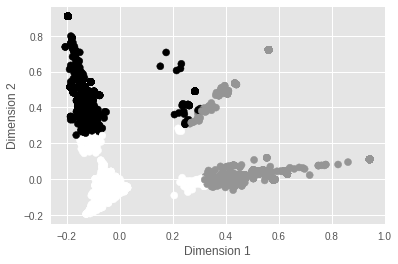

In [ ]:
km = KMeans(n_clusters=3)
km = km.fit(X)
kmeans_labels= km.predict(X)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X['dim1'],X['dim2'], c=kmeans_labels )

In [ ]:
used

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,NEWcluster
0,0.0,0.0,0.0,0.0,0.0,0.678161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.734913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.586345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.591676,0.0,0.553280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746551,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.665328,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63320,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.630256,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776387,0.0,0.0,0.0,0.0,0.0,0.0,0
63321,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
63322,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
63323,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.741605,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.670836,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


========================0=========================


,0,word
26,3019.619836,healthcare
46,2105.871916,today
42,1981.787224,law
59,1751.735644,better
5,1629.513926,new
57,1290.290535,many
47,1212.277801,like
24,1190.327959,women
1,1121.388106,risk
71,1111.518674,obamacare


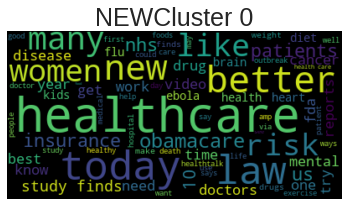

========================1=========================


,0,word
16,3082.676063,food
50,225.386971,health care
51,214.109964,see
57,198.540969,many
33,157.942494,diet
46,149.133086,today
26,145.464266,healthcare
12,102.829596,may
67,84.350931,know
14,76.723921,patients


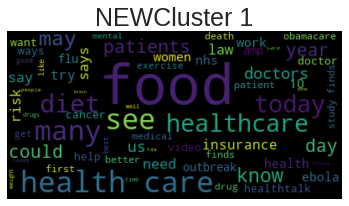

In [ ]:
for c in set(used["NEWcluster"].tolist()):
    print("{:=^50}".format(c))
    use = pd.DataFrame(used[used["NEWcluster"]==c].drop(columns=["NEWcluster"]).sum(axis=0))
    use = use.sort_values(by=0, ascending=False)
    use["word"] = [keys[x] for x in use.index.values]
    
    display(use.head(10))    
    
    freq = {}
    for index, row in use.iterrows():
        freq[row["word"]] = row[0]
    
    wordcloud = WordCloud().generate_from_frequencies(freq)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("NEWCluster {}".format(c), fontsize=25)
    plt.show()

In [14]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import DBSCAN
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors

In [ ]:
#http://saedsayad.com/clustering_hierarchical.htm
Zd = linkage(X, method="ward")
dn = dendrogram(Zd)
plt.ylabel('Inter-cluster distance')
plt.show()

In [ ]:
clusters_Hierarchical = fcluster(Zd, 60, criterion='distance')
f=plt.figure()
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X['dim1'],X['dim2'], c=clusters_Hierarchical)  
plt.show()

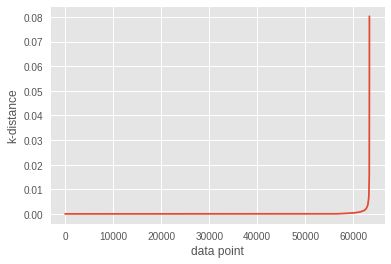

In [15]:
#https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
neigh = NearestNeighbors(n_neighbors=int(np.log(len(X))))
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.ylabel("k-distance")
plt.xlabel("data point")
plt.plot(distances)

In [ ]:
dbs = DBSCAN(eps=1, min_samples=int(np.log(len(X)))).fit(X)

In [ ]:
plt.scatter(X['dim1'],X['dim2'], c=dbs.labels_) 